# Exercise 2 - Logistic Regression

## Load the data...

In [1]:
data = load('ex2data1.txt')

data =

   34.62366   78.02469    0.00000
   30.28671   43.89500    0.00000
   35.84741   72.90220    0.00000
   60.18260   86.30855    1.00000
   79.03274   75.34438    1.00000
   45.08328   56.31637    0.00000
   61.10666   96.51143    1.00000
   75.02475   46.55401    1.00000
   76.09879   87.42057    1.00000
   84.43282   43.53339    1.00000
   95.86156   38.22528    0.00000
   75.01366   30.60326    0.00000
   82.30705   76.48196    1.00000
   69.36459   97.71869    1.00000
   39.53834   76.03681    0.00000
   53.97105   89.20735    1.00000
   69.07014   52.74047    1.00000
   67.94686   46.67857    0.00000
   70.66151   92.92714    1.00000
   76.97878   47.57596    1.00000
   67.37203   42.83844    0.00000
   89.67678   65.79937    1.00000
   50.53479   48.85581    0.00000
   34.21206   44.20953    0.00000
   77.92409   68.97236    1.00000
   62.27101   69.95446    1.00000
   80.19018   44.82163    1.00000
   93.11439   38.80067    0.00000
   61.83021   50.25611    0.00000
   38.

### Separate the training data from what we want to predict...

In [2]:
X = data(:, [1,2]);
y = data(:, 3);

In [3]:
X(:,2)

ans =

   78.025
   43.895
   72.902
   86.309
   75.344
   56.316
   96.511
   46.554
   87.421
   43.533
   38.225
   30.603
   76.482
   97.719
   76.037
   89.207
   52.740
   46.679
   92.927
   47.576
   42.838
   65.799
   48.856
   44.210
   68.972
   69.954
   44.822
   38.801
   50.256
   64.996
   72.808
   57.052
   63.128
   69.433
   71.168
   52.214
   98.869
   80.908
   41.573
   75.238
   56.308
   46.856
   65.569
   40.618
   45.823
   52.061
   70.458
   86.728
   96.769
   88.696
   74.163
   60.999
   43.391
   60.396
   49.805
   59.809
   68.862
   95.599
   69.825
   78.454
   85.760
   47.021
   39.261
   49.593
   66.450
   41.092
   97.535
   51.883
   92.116
   60.991
   43.307
   78.032
   96.228
   73.095
   75.858
   72.369
   88.476
   75.810
   42.508
   42.720
   69.804
   45.694
   66.589
   59.514
   90.960
   85.594
   78.845
   90.425
   96.647
   60.770
   77.159
   87.509
   35.571
   84.845
   45.358
   48.380
   87.104
   68.775
   64.932
   

### Visualize the data before working with it...

In [5]:
help plot

'plot' is a function from the file /usr/local/octave/3.8.0/share/octave/3.8.0/m/plot/draw/plot.m

 -- Function File: plot (Y)
 -- Function File: plot (X, Y)
 -- Function File: plot (X, Y, FMT)
 -- Function File: plot (..., PROPERTY, VALUE, ...)
 -- Function File: plot (X1, Y1, ..., XN, YN)
 -- Function File: plot (HAX, ...)
 -- Function File: H = plot (...)
     Produce 2-D plots.

     Many different combinations of arguments are possible.  The
     simplest form is

          plot (Y)

     where the argument is taken as the set of Y coordinates and the X
     coordinates are taken to be the range '1:numel (Y)'.

     If more than one argument is given, they are interpreted as

          plot (Y, PROPERTY, VALUE, ...)

     or

          plot (X, Y, PROPERTY, VALUE, ...)

     or

          plot (X, Y, FMT, ...)

     and so on.  Any number of argument sets may appear.  The X and Y
     values are interpreted as follows:

        * If a single data argument is supplied, it is taken a

In [7]:
find(y==0)

ans =

    1
    2
    3
    6
   11
   12
   15
   18
   21
   23
   24
   28
   29
   30
   33
   35
   36
   37
   39
   40
   42
   44
   45
   46
   54
   55
   56
   58
   62
   63
   64
   65
   66
   68
   71
   79
   80
   87
   90
   93



In [64]:
X((:,1) find(y==0))

parse error:

  syntax error

>>> X((:,1) find(y==0))
       ^



In [20]:
help plot

'plot' is a function from the file /usr/local/octave/3.8.0/share/octave/3.8.0/m/plot/draw/plot.m

 -- Function File: plot (Y)
 -- Function File: plot (X, Y)
 -- Function File: plot (X, Y, FMT)
 -- Function File: plot (..., PROPERTY, VALUE, ...)
 -- Function File: plot (X1, Y1, ..., XN, YN)
 -- Function File: plot (HAX, ...)
 -- Function File: H = plot (...)
     Produce 2-D plots.

     Many different combinations of arguments are possible.  The
     simplest form is

          plot (Y)

     where the argument is taken as the set of Y coordinates and the X
     coordinates are taken to be the range '1:numel (Y)'.

     If more than one argument is given, they are interpreted as

          plot (Y, PROPERTY, VALUE, ...)

     or

          plot (X, Y, PROPERTY, VALUE, ...)

     or

          plot (X, Y, FMT, ...)

     and so on.  Any number of argument sets may appear.  The X and Y
     values are interpreted as follows:

        * If a single data argument is supplied, it is taken a

## Plot...

In [3]:
function plotData(X,y)
   
   #get the row indices where y = 1 
   positive = find(y==1);
   
   #get the row indices where y = 0
   negative = find(y==0);
   
   plot(X(positive,1),X(positive,2),'k+','LineWidth',2,'MarkerSize',7);
   hold on;
   plot(X(negative,1),X(negative,2),'ko','MarkerFaceColor','y','MarkerSize',7);
   xlabel("Exam 1 score");
   ylabel("Exam 2 score");
   legend('Admitted','Not admitted')
end

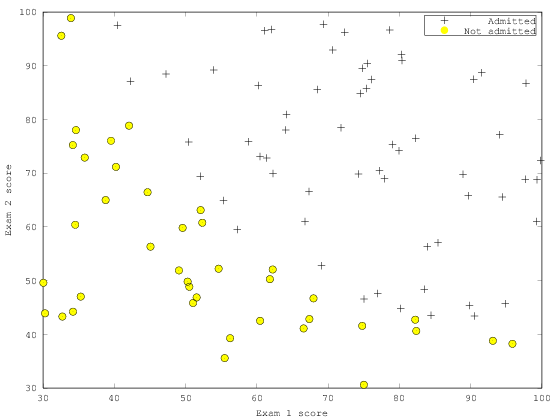

In [4]:
plotData(X,y)

## Sigmoid Function...

### Defined as $g(z) = \frac{1}{1 + e^{-z}}$

In [5]:
function g = sigmoid(z)

   g = zeros(size(z));
   g = 1./(1 + exp(-z));

end

In [5]:
sigmoid(0)

ans =  0.50000


In [39]:
sigmoid(1)

ans =  0.73106


In [40]:
sigmoid(10)

ans =  0.99995


In [41]:
sigmoid(12)

ans =  0.99999


In [42]:
sigmoid(20)

ans =  1.00000


In [43]:
sigmoid(30)

ans =  1.00000


In [44]:
sigmoid(100)

ans =  1


In [45]:
sigmoid(1000)

ans =  1


In [46]:
sigmoid(-5)

ans =  0.0066929


In [47]:
sigmoid(-.5)

ans =  0.37754


In [48]:
sigmoid(-100)

ans =    3.7201e-44


In [49]:
sigmoid(-1000)

ans = 0


In [50]:
sigmoid(-1)

ans =  0.26894


## Cost Function...

### Non-regularized version with the ```-``` distributed:
$J(\theta) = \frac{1}{m}\displaystyle\sum_{i=1}^{m}\Bigg[-y^{(i)}log(h_\theta(x^{(i)})) - (1 - y^{(i)})log(1 - h_\theta(x^{(i)}))\Bigg]$

### Vectorized:
$J(\theta) = \frac{1}{m}\cdot\Big(-y^T log(h) - (1 - y)^T log(1 - h)\Big)$

## Gradient Descent...

### Non-regularized version (same as with linear regression):

$\theta_j := \theta_j - \alpha\frac{1}{m}\displaystyle\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j$

### Vectorized:

$\theta_j := \theta_j - \frac{\alpha}{m}X^T(g(X\theta) - \overrightarrow{y})$

### Non-vectorized partial derivative of $J(\theta)$ which you use for returning the gradient elements if will be using the ```fminunc``` Octave function (See LogisticRegression (Week 3) notebook under *Advanced Optimization* for more):

$\frac{\partial J(\theta)}{\partial\theta_j} = \frac{1}{m}\displaystyle\sum_{i=1}^{m}\Big(h_\theta(x^{(i)}) - y^{(i)}\Big)x_j^{(i)}$

### Vectorized partial derivative of $J(\theta)$ which we're using below:

$\nabla J(\theta) = \frac{1}{m}\cdot X^T\cdot(g(X\cdot\theta) - \overrightarrow{y})$



In [52]:
function [J, gradient] = costFunction(theta, X, y)
   m = length(y); #number of training samples
   J = 0;
   gradient = zeros(size(theta));
   
   h = sigmoid(X * theta);
   
   #vectorized cost function
   J = ((-y' * log(h)) - ((1-y)' * log(1-h)))/m;
   
   #vectorized gradient descent
   errors = (h-y);
   errorsMatrix = X'*errors;
   thetaNew = (1/m)*errorsMatrix;
   gradient = thetaNew;

end

### Debugging...

In [58]:
h = sigmoid(X * initial_theta);
errors = h-y;
errorsMatrix = X'*errors;
m = length(y);
thetaNew = (1/m)*errorsMatrix

errorsMatrix =

    -10.000
  -1200.922
  -1126.284

thetaNew =

   -0.10000
  -12.00922
  -11.26284



In [8]:
[m,n] = size(X)

m =  100
n =  2


### Add a feature for the intercept or $\theta_0$ feature...

In [9]:
X = [ones(m,1) X]

X =

    1.0000   34.6237   78.0247
    1.0000   30.2867   43.8950
    1.0000   35.8474   72.9022
    1.0000   60.1826   86.3086
    1.0000   79.0327   75.3444
    1.0000   45.0833   56.3164
    1.0000   61.1067   96.5114
    1.0000   75.0247   46.5540
    1.0000   76.0988   87.4206
    1.0000   84.4328   43.5334
    1.0000   95.8616   38.2253
    1.0000   75.0137   30.6033
    1.0000   82.3071   76.4820
    1.0000   69.3646   97.7187
    1.0000   39.5383   76.0368
    1.0000   53.9711   89.2074
    1.0000   69.0701   52.7405
    1.0000   67.9469   46.6786
    1.0000   70.6615   92.9271
    1.0000   76.9788   47.5760
    1.0000   67.3720   42.8384
    1.0000   89.6768   65.7994
    1.0000   50.5348   48.8558
    1.0000   34.2121   44.2095
    1.0000   77.9241   68.9724
    1.0000   62.2710   69.9545
    1.0000   80.1902   44.8216
    1.0000   93.1144   38.8007
    1.0000   61.8302   50.2561
    1.0000   38.7858   64.9957
    1.0000   61.3793   72.8079
    1.0000   85.4045   57.0520
   

In [10]:
initial_theta = zeros(n+1,1);
size(initial_theta)

ans =

   3   1



In [11]:
size(y)
size(X)

ans =

   100     1

ans =

   100     3



In [12]:
[J, gradient] = costFunction(initial_theta, X, y);

In [13]:
J

J =  0.69315


In [14]:
gradient

gradient =

   -0.10000
  -12.00922
  -11.26284



In [47]:
theta

error: 'theta' undefined near line 1 column 1


In [48]:
initial_theta

initial_theta =

   0
   0
   0



## Call ```fminunc``` (again, see Logistic Regression Week 3 Notebook under ***Advanced Optimization*** or ex2.pdf for more)...

In [15]:
options = optimset('GradObj','on','MaxIter',400);
[theta,cost] = fminunc(@(t) (costFunction(t,X,y)),initial_theta,options);

In [16]:
cost

cost =  0.20350


In [17]:
theta

theta =

  -25.16127
    0.20623
    0.20147



### Use the optimal theta to get the logistic distribution probability of a student being admitted using a test observation.  See these links:

https://www.coursera.org/learn/machine-learning/discussions/weeks/3/threads/poUNvD1-EeakuhJbRt69hQ

https://math.stackexchange.com/questions/320310/is-the-sigmoid-function-a-probability-distribution

https://en.wikipedia.org/wiki/Logistic_distribution

In [2]:
x = [1 45 85];
logistic_probability = sigmoid(x*theta)

error: 'theta' undefined near line 1 column 34
error: evaluating argument list element number 1


### The logistic distribution probability of a student getting admitted to the university with these exam grades is 77.6%

TODO:  

$\sqrt{}{}$ Review plotDecisionBoundary.m for how the decision boundary is plotted

$\sqrt{}{}$ How do they compute the +/- error of .002 as shown in ex2.m? They didn't, they chose it because of the difference in results between Octave/MATLAB 😎, according to this post: 

https://www.coursera.org/learn/machine-learning/discussions/all/threads/PauoPcmkEemoRBJ2Jg_D_A


### Plot the Decistion Boundary.  See this post for an explanation:
https://www.coursera.org/learn/machine-learning/discussions/weeks/3/threads/HAEss7C7EeWoGg6ulZMPEw

In [19]:
function plotDecisionBoundary(theta, X, y)
   plotData(X(:,2:3),y);
   hold on;
   if size(X,2) <= 3
      plot_x = [min(X(:,2))-2, max(X(:,2))+2];
      plot_y = (-1./theta(3)).*(theta(2).*plot_x + theta(1));
      plot(plot_x,plot_y)
      legend('Admitted','Not admitted','Decision Boundary')
      axis([30,100,30,100]) #basically zooms in on the data to link the boundary to the respective axes
   end
   hold off
end

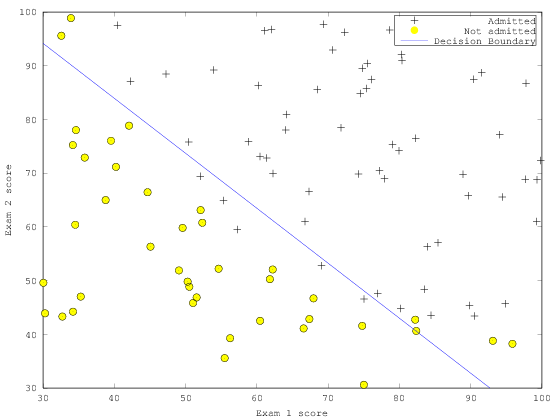

In [20]:
plotDecisionBoundary(theta, X, y)

## Predictions...

### Predict the '''y''' classifications for the entire dataset...

In [21]:
function predictions = predict(theta,X)

   m = size(X,1);
   predictions = zeros(m,1);
   
   probabilities = sigmoid(X*theta);
   for i=1:m
      if probabilities(i) >= .5
         predictions(i) = 1;
      else
         predictions(i) = 0;
      end
   end

end

In [22]:
predictions = predict(theta,X);

In [23]:
X_prime = [X predictions y] %predictions are the 4th column and actual y values are the 5th

X_prime =

    1.00000   34.62366   78.02469    0.00000    0.00000
    1.00000   30.28671   43.89500    0.00000    0.00000
    1.00000   35.84741   72.90220    0.00000    0.00000
    1.00000   60.18260   86.30855    1.00000    1.00000
    1.00000   79.03274   75.34438    1.00000    1.00000
    1.00000   45.08328   56.31637    0.00000    0.00000
    1.00000   61.10666   96.51143    1.00000    1.00000
    1.00000   75.02475   46.55401    0.00000    1.00000
    1.00000   76.09879   87.42057    1.00000    1.00000
    1.00000   84.43282   43.53339    1.00000    1.00000
    1.00000   95.86156   38.22528    1.00000    0.00000
    1.00000   75.01366   30.60326    0.00000    0.00000
    1.00000   82.30705   76.48196    1.00000    1.00000
    1.00000   69.36459   97.71869    1.00000    1.00000
    1.00000   39.53834   76.03681    0.00000    0.00000
    1.00000   53.97105   89.20735    1.00000    1.00000
    1.00000   69.07014   52.74047    0.00000    1.00000
    1.00000   67.94686   46.67857    

In [24]:
X_prime(:,2)

ans =

   34.624
   30.287
   35.847
   60.183
   79.033
   45.083
   61.107
   75.025
   76.099
   84.433
   95.862
   75.014
   82.307
   69.365
   39.538
   53.971
   69.070
   67.947
   70.662
   76.979
   67.372
   89.677
   50.535
   34.212
   77.924
   62.271
   80.190
   93.114
   61.830
   38.786
   61.379
   85.405
   52.108
   52.045
   40.237
   54.635
   33.916
   64.177
   74.789
   34.184
   83.902
   51.548
   94.443
   82.369
   51.048
   62.223
   77.193
   97.772
   62.073
   91.565
   79.945
   99.273
   90.547
   34.525
   50.286
   49.587
   97.646
   32.577
   74.249
   71.796
   75.396
   35.286
   56.254
   30.059
   44.668
   66.561
   40.458
   49.073
   80.280
   66.747
   32.723
   64.039
   72.346
   60.458
   58.841
   99.828
   47.264
   50.458
   60.456
   82.227
   88.914
   94.835
   67.319
   57.239
   80.367
   68.469
   42.075
   75.478
   78.635
   52.348
   94.094
   90.449
   55.482
   74.493
   89.846
   83.489
   42.262
   99.315
   55.340
   

In [25]:
size(X_prime)

ans =

   100     5



In [26]:
discrepancies = find(X_prime(:,4)!=X_prime(:,5))

discrepancies =

    8
   11
   17
   28
   34
   37
   44
   58
   80
   84
   99



In [27]:
size(discrepancies)

ans =

   11    1



In [28]:
X_prime(discrepancies,[1 5])

ans =

   1   1
   1   0
   1   1
   1   0
   1   1
   1   0
   1   0
   1   0
   1   0
   1   1
   1   1



In [29]:
X_discrep = X(discrepancies,[1 2 3])

X_discrep =

    1.0000   75.0247   46.5540
    1.0000   95.8616   38.2253
    1.0000   69.0701   52.7405
    1.0000   93.1144   38.8007
    1.0000   52.0454   69.4329
    1.0000   33.9155   98.8694
    1.0000   82.3688   40.6183
    1.0000   32.5772   95.5985
    1.0000   82.2267   42.7199
    1.0000   57.2387   59.5143
    1.0000   55.3400   64.9319



In [30]:
size(X_discrep,2)

ans =  3


In [31]:
size(y)

ans =

   100     1



In [32]:
y_discrep = y(discrepancies,[1])

y_discrep =

   1
   0
   1
   0
   1
   0
   0
   0
   0
   1
   1



In [33]:
size(X_discrep,1)
size(y_discrep,1)

ans =  11
ans =  11


## Plot the scores and their actual admittance status from the ones we disagree on...

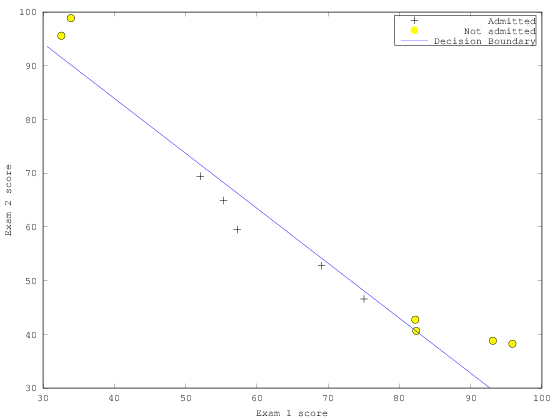

In [34]:
plotDecisionBoundary(theta,X_discrep,y_discrep)

## Plot the actuals and what we think their admittance status should be (should be the opposite status)...

In [40]:
X_prime_predictions = X_prime(discrepancies,[4])

X_prime_predictions =

   0
   1
   0
   1
   0
   1
   1
   1
   1
   0
   0



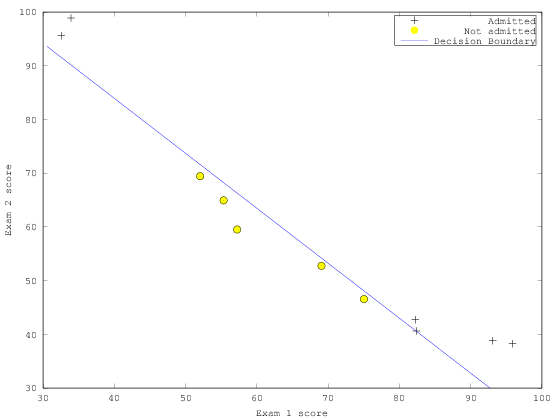

In [41]:
plotDecisionBoundary(theta,X_discrep,X_prime_predictions)

## As expected, these are the opposite classification.  Also, these are all relatively close to the decision boundary, so it makes some sense that these would be where we disagree.

## Regularization...

### Visualize the microchip dataset...

In [43]:
microchip_data = load('ex2data2.txt')

microchip_data =

   0.05127   0.69956   1.00000
  -0.09274   0.68494   1.00000
  -0.21371   0.69225   1.00000
  -0.37500   0.50219   1.00000
  -0.51325   0.46564   1.00000
  -0.52477   0.20980   1.00000
  -0.39804   0.03436   1.00000
  -0.30588  -0.19225   1.00000
   0.01671  -0.40424   1.00000
   0.13191  -0.51389   1.00000
   0.38537  -0.56506   1.00000
   0.52938  -0.52120   1.00000
   0.63882  -0.24342   1.00000
   0.73675  -0.18494   1.00000
   0.54666   0.48757   1.00000
   0.32200   0.58260   1.00000
   0.16647   0.53874   1.00000
  -0.04666   0.81652   1.00000
  -0.17339   0.69956   1.00000
  -0.47869   0.63377   1.00000
  -0.60541   0.59722   1.00000
  -0.62846   0.33406   1.00000
  -0.59389   0.00512   1.00000
  -0.42108  -0.27266   1.00000
  -0.11578  -0.39693   1.00000
   0.20104  -0.60161   1.00000
   0.46601  -0.53582   1.00000
   0.67339  -0.53582   1.00000
  -0.13882   0.54605   1.00000
  -0.29435   0.77997   1.00000
  -0.26555   0.96272   1.00000
  -0.16187   0.80190 

In [45]:
X_microchip = microchip_data(:,[1 2])

X_microchip =

   0.0512670   0.6995600
  -0.0927420   0.6849400
  -0.2137100   0.6922500
  -0.3750000   0.5021900
  -0.5132500   0.4656400
  -0.5247700   0.2098000
  -0.3980400   0.0343570
  -0.3058800  -0.1922500
   0.0167050  -0.4042400
   0.1319100  -0.5138900
   0.3853700  -0.5650600
   0.5293800  -0.5212000
   0.6388200  -0.2434200
   0.7367500  -0.1849400
   0.5466600   0.4875700
   0.3220000   0.5826000
   0.1664700   0.5387400
  -0.0466590   0.8165200
  -0.1733900   0.6995600
  -0.4786900   0.6337700
  -0.6054100   0.5972200
  -0.6284600   0.3340600
  -0.5938900   0.0051170
  -0.4210800  -0.2726600
  -0.1157800  -0.3969300
   0.2010400  -0.6016100
   0.4660100  -0.5358200
   0.6733900  -0.5358200
  -0.1388200   0.5460500
  -0.2943500   0.7799700
  -0.2655500   0.9627200
  -0.1618700   0.8019000
  -0.1733900   0.6483900
  -0.2828300   0.4729500
  -0.3634800   0.3121300
  -0.3001200   0.0270470
  -0.2367500  -0.2141800
  -0.0639400  -0.1849400
   0.0627880  -0.1630100
   0.22984

In [48]:
y_microchip = microchip_data(:,3)

y_microchip =

   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0



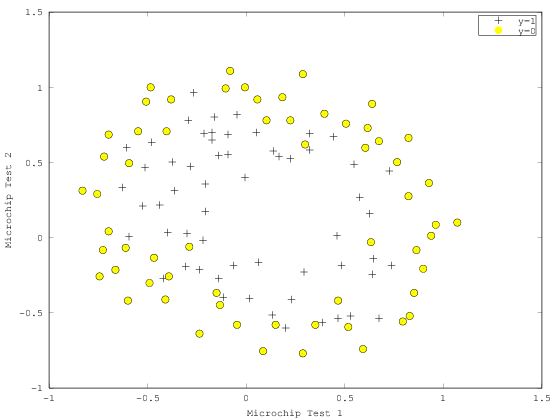

In [56]:
plotData(X_microchip,y_microchip);
hold on;
xlabel('Microchip Test 1');
ylabel('Microchip Test 2');
legend('y=1','y=0');
hold off;

### The equation for a regularized logistic regression cost function looks like this:

$J(\theta) = -\frac{1}{m}\displaystyle\sum_{i=1}^{m}\Bigg[y^{(i)}log(h_\theta(x^{(i)})) + (1 - y^{(i)})log(1 - h_\theta(x^{(i)}))\Bigg] + \frac{\lambda}{2m}\displaystyle\sum_{j=1}^{n}\theta_j^2\Bigg]$

### The equations for a regularized, logistic regression partial derivative used by ```fminunc``` for calculating gradient descent are:

Again, we don't penalize $\theta_0$.  So $\theta_0$ continues to look like this (no change from before):

$\frac{\partial J(\theta)}{\partial\theta_j} = \frac{1}{m}\displaystyle\sum_{i=1}^{m}\Big(h_\theta(x^{(i)}) - y^{(i)}\Big)x_j^{(i)}$ for j = 0

But we do penalize the other features using a simplified regularization parameter:

$\frac{\partial J(\theta)}{\partial\theta_j} - \alpha\frac{1}{m}\displaystyle\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j + \frac{\lambda}{m}\theta_j$ for j >= 1

***NOTE: $h_\theta(x)$ is the hyptothesis function for Logistic Regression (the Sigmoid function): $h_\theta(x)=\frac{1}{1 + e^{-\theta^Tx}}$***

In [65]:
#this tutorial was quite helpful, especially with the regularization:  https://www.coursera.org/learn/machine-learning/discussions/all/threads/GVdQ9vTdEeSUBCIAC9QURQ
function [J, gradient] = costFunctionRegularized(theta, X, y, lambda)
   m = length(y); #number of training samples
   J = 0;
   gradient = zeros(size(theta));
   
   h = sigmoid(X * theta);
   
   #vectorized cost function
   unregularizedCost = ((-y' * log(h)) - ((1-y)' * log(1-h)))/m;

   #remember, we don't want to penalize theta zero and Octave starts indexing array elements at 1 so we need to set that element to 0
   theta(1) = 0;

   #must use a transpose on order to multiply the dimensions
   sumOfSquares = theta' * theta;
   
   costRegularizationTerm = (lambda/(2*m))*sumOfSquares;
   
   J = unregularizedCost + costRegularizationTerm;
   
   #vectorized gradient descent partial derivatives
   errors = (h-y);
   errorsMatrix = X'*errors;
   unregularizedGradient = (1/m)*errorsMatrix;
   
   #compute the regularization term for gradient descent
   gradientRegularizationTerm = (lambda/m) * theta;
   
   #now sum up the gradient descent calculation and the regularization term
   gradient = unregularizedGradient + gradientRegularizationTerm;

end

In [63]:
initial_theta = zeros(size(X_microchip,2),1)

initial_theta =

   0
   0



In [68]:
lambda = 1; #taken from the exercise code in ex2_reg.m
[J, gradient] = costFunctionRegularized(initial_theta,X_microchip,y_microchip,lambda);

In [69]:
J
gradient

J =  0.69315
gradient =

   1.8788e-02
   7.7771e-05

